In [89]:
! pip install control
import numpy as np
from scipy import signal
from scipy.linalg import expm
from control import *
import matplotlib.pyplot    as     plt
from   matplotlib.animation import FuncAnimation
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**TRABAJO PRÁCTICO FINAL - CONTROL DIGITAL**

---



1. Respuesta al escalón del sitema a lazo abierto. Y medición del tiempo de subida. 


Función Time Rise:

def calculate_rise_time ( signal , time , ref_value =1):
    # Find the index where the signal first crosses the start threshold
    start_index = np.argmax ( signal >= 0.1 * ref_value )
    # Find the index where the signal crosses the end threshold
    end_index = np.argmax( signal >= 0.9 * ref_value )
    # Calculate the rise time as the difference between the two indices
    rise_time = time [ end_index ] = time [ start_index ]
    return rise_time

In [90]:
def calculate_rise_time ( signal , time , ref_value =1):
    # Find the index where the signal first crosses the start threshold
    start_index = np.argmax ( signal >= 0.1 * ref_value )
    # Find the index where the signal crosses the end threshold
    end_index = np.argmax( signal >= 0.9 * ref_value )
    # Calculate the rise time as the difference between the two indices
    rise_time = time [ end_index ] - time [ start_index ]
    return rise_time

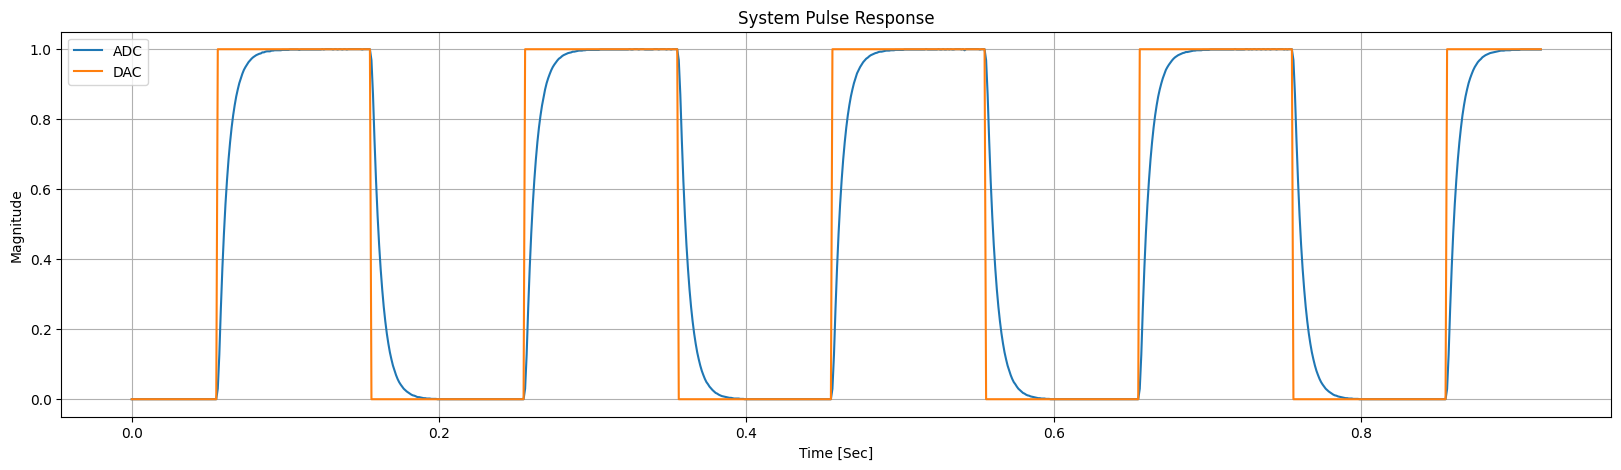

In [92]:
muestra = pd.read_csv('Data_Educiia.csv')

SAMPLES = 1000

SAMPLE_INDEX = 0
plt.figure(figsize=(20, 5))
plt.plot(muestra['TIEMPO'][SAMPLE_INDEX:SAMPLES], muestra['ADC'][SAMPLE_INDEX:SAMPLES],'-', label='ADC')
plt.plot(muestra['TIEMPO'][SAMPLE_INDEX:SAMPLES], muestra['DAC'][SAMPLE_INDEX:SAMPLES], '-',label='DAC')
plt.title('System Pulse Response')
plt.ylabel('Magnitude')
plt.xlabel('Time [Sec]')
plt.legend()
plt.grid()

In [93]:
print(calculate_rise_time(muestra['ADC'], muestra['TIEMPO']))

0.013000000000000005


2. Identificación: Determinar el valor de los polos del sistema mediante identificación, considerando al sistema como una caja gris.

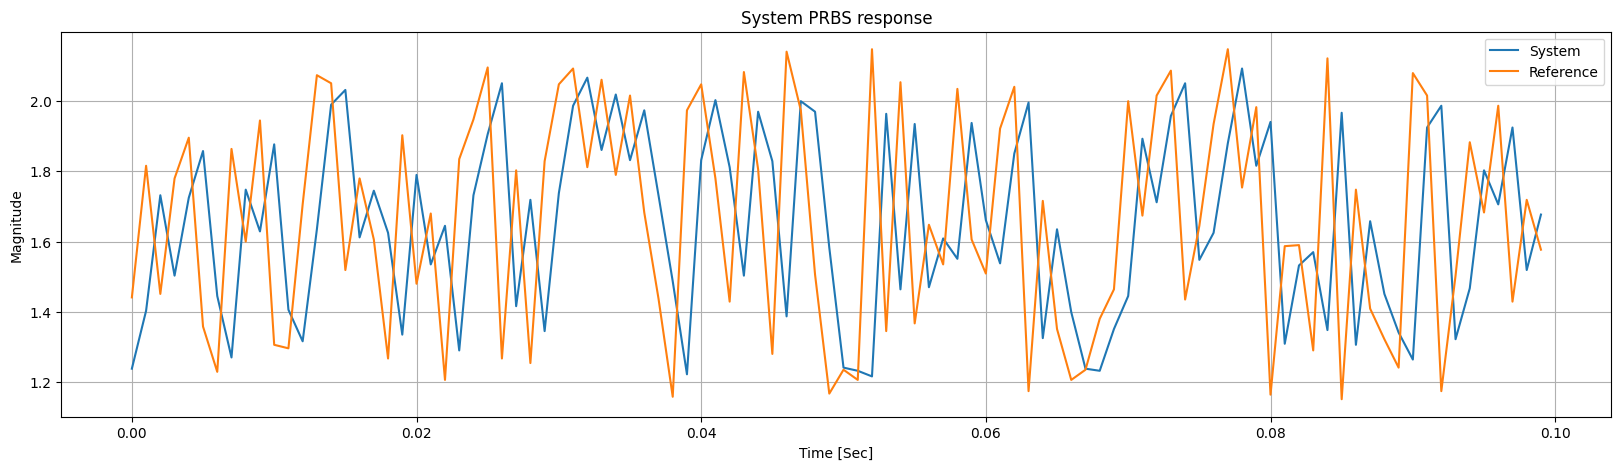

In [94]:
muestra_ls = pd.read_csv('Data_Educiia_ls.csv')

SAMPLES = 100

SAMPLE_INDEX = 0
plt.figure(figsize=(20, 5))
plt.plot(muestra_ls['TIEMPO'][SAMPLE_INDEX:SAMPLES], muestra_ls['ADC'][SAMPLE_INDEX:SAMPLES], label='System')
plt.plot(muestra_ls['TIEMPO'][SAMPLE_INDEX:SAMPLES], muestra_ls['DAC'][SAMPLE_INDEX:SAMPLES],label='Reference')
plt.title('System PRBS response')
plt.ylabel('Magnitude')
plt.xlabel('Time [Sec]')
plt.legend()
plt.grid()

In [95]:
Parametros = [0.062,0.007,0.131,0.660,0.062]
print(Parametros)

[0.062, 0.007, 0.131, 0.66, 0.062]


3.Controlador PID: Diseñar y aplicar un control PID para cumplir con las siguientes especificaciones:

0.012999999999999998


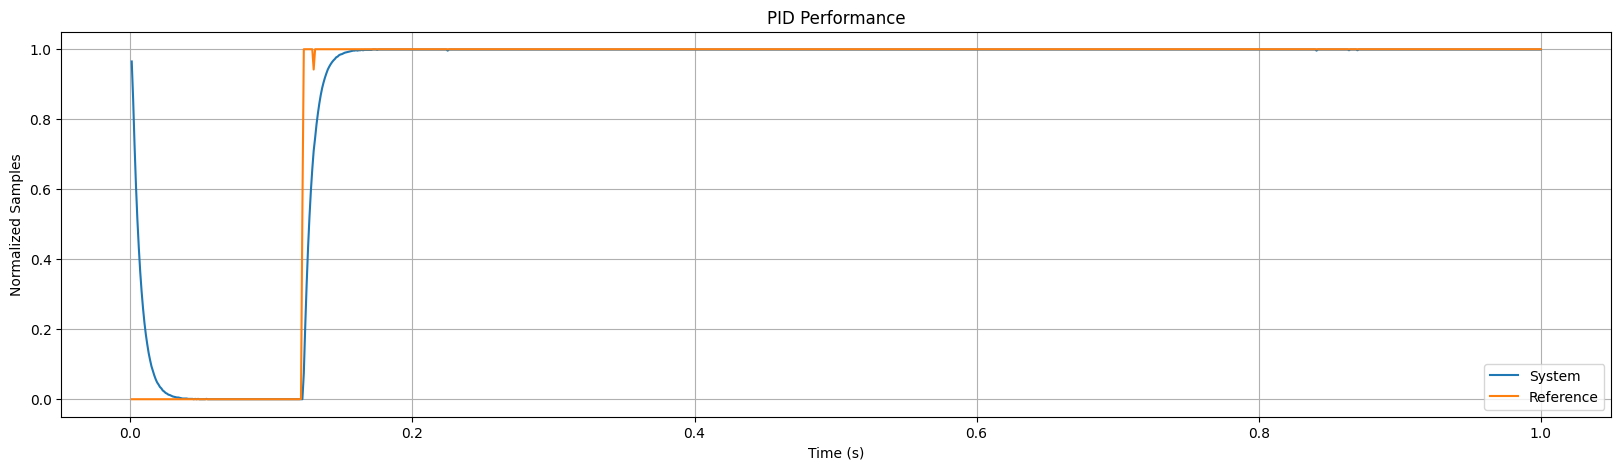

In [97]:
#with Kp = 1.64, Ki = 561, Kd = 0.000672

# Load the CSV files into pandas dataframes
Pid = pd.read_csv("Data_Educiia_PID_Retro.csv")

# Plot the error signal
SAMPLES = 1000

SAMPLE_INDEX = 0
plt.figure(figsize=(20, 5))
plt.plot(Pid['TIEMPO'][SAMPLE_INDEX:SAMPLES], Pid['ADC'][SAMPLE_INDEX:SAMPLES], label='System')
plt.plot(Pid['TIEMPO'][SAMPLE_INDEX:SAMPLES], Pid['DAC'][SAMPLE_INDEX:SAMPLES],label='Reference')
plt.title("PID Performance")
plt.xlabel("Time (s)")
plt.ylabel("Normalized Samples")
plt.grid()
plt.legend()

print(calculate_rise_time(Pid['ADC'][50:500], Pid['TIEMPO'][50:500]))